# Проект: Линейные модели в машинном обучении


К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия контракта позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:

Средний удой за год — не менее 6000 килограммов.

Молоко должно быть вкусным.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st


#Графики
import seaborn as sns
import matplotlib.pyplot as plt
from re import template
import plotly.express as px
from plotly.subplots import make_subplots

# Для МО
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


# Метрики для Линейной Регрессии
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


# Метрики для Логистической Регрессии
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn. metrics import precision_recall_curve

## Загрузка данных

In [2]:
df_main = pd.read_csv('/datasets/ferma_main.csv',sep=';')
df_dad = pd.read_csv('/datasets/ferma_dad.csv',sep=';')
df_cow = pd.read_csv('/datasets/cow_buy.csv',sep=';')

### Изучим главный датасет, с данным о коровах фермера.

In [3]:
df_main.head(10)
    

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


In [4]:
df_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

#### Описание данных:

- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова. порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

#### Вывод по первым данным:
- Нет единообразия в измерительных еденицах(кг / граммы)
- Столбцы названы не единообразно
- во всех столбцах одинаковое количество данных, что предполагает отсутствие пропусков на первый взгляд


### Изучим данные о отцах каждой коровы в стаде фермера. 

In [5]:
df_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [6]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


#### Описание данных
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

#### Вывод по второму датасету: 
- Нет единообразия
- Количество строк не равно первому датасету, видимо, есть пропуски. Обработаем после. 

### Изучим данные о коровах, которые рассматриваются на покупуку. 

In [7]:
df_cow.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [8]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


#### Описание данных
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

#### Вывод по 3ему датасету: 
- Самый небольшой датасет, всего 20 строк
- 

#### Общий вывод: необходимо осуществить предобработку данных. Изменить названия столбцов, проверить наличие дубликатов, поменять тип данных.

##  Предобработка данных

In [9]:
df_main.columns


Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [10]:
df_main = df_main.rename(
    columns={
        'Удой, кг': 'yield',
        "ЭКЕ (Энергетическая кормовая единица)": "efu",
        "Сырой протеин, г": "raw_protein",
        "СПО (Сахаро-протеиновое соотношение)" : "spr",
        "Порода": "breed",
        "Тип пастбища" : "type_pasture",
        "порода папы_быка" : "dads_breed",
        "Жирность,%" : "fat_content",
        "Белок,%" : "protein",
        "Вкус молока" : "milk_taste",
        "Возраст" : "age"
    }
)

In [11]:
# Проверим
df_main.columns

Index(['id', 'yield', 'efu', 'raw_protein', 'spr', 'breed', 'type_pasture',
       'dads_breed', 'fat_content', 'protein', 'milk_taste', 'age'],
      dtype='object')

In [12]:
df_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [13]:
df_dad = df_dad.rename(
    columns = {
        "Имя Папы" : "dads_name"
    }
)

In [14]:
# Проверим
df_dad.columns


Index(['id', 'dads_name'], dtype='object')

In [15]:
df_cow.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [16]:
df_cow = df_cow.rename(
    columns = {
        "Порода": "breed",
        "Тип пастбища": "type_pasture",
        "порода папы_быка": "dads_breed",
        "Имя_папы": "dads_name",
        "Текущая_жирность,%": "fat_content",
        "Текущий_уровень_белок,%": "protein",
        "Возраст": "age"
    }
)

In [17]:
df_cow.columns

Index(['breed', 'type_pasture', 'dads_breed', 'dads_name', 'fat_content',
       'protein', 'age'],
      dtype='object')

#### Обработка пропусков

In [18]:
df_main.isna().sum()

id              0
yield           0
efu             0
raw_protein     0
spr             0
breed           0
type_pasture    0
dads_breed      0
fat_content     0
protein         0
milk_taste      0
age             0
dtype: int64

In [19]:
df_dad.isna().sum()

id           0
dads_name    0
dtype: int64

In [20]:
df_cow.isna().sum()

breed           0
type_pasture    0
dads_breed      0
dads_name       0
fat_content     0
protein         0
age             0
dtype: int64

#### Обработка дубликатов

In [21]:
df_main.duplicated().sum()


5

In [22]:
df_dad.duplicated().sum()

0

In [23]:
df_cow.duplicated().sum()

4

In [24]:
#посмотрим на дубликаты
df_main[df_main.duplicated()]

,id,yield,efu,raw_protein,spr,breed,type_pasture,dads_breed,fat_content,protein,milk_taste,age
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [25]:
# Верим, дропаем: 
# df_main.drop_duplicates()
# Понял, что некорректно использовал формулу. Исправляюю:
df_main.drop_duplicates(inplace=True)

In [26]:
df_main.duplicated().sum()


0

In [27]:
df_cow[df_cow.duplicated()]

,breed,type_pasture,dads_breed,dads_name,fat_content,protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


##### Тут у коров просто схож показатель, если вчитаться, то становится понятно что это не дубликаты, а схожие показатели.

#### Обработаем неявные дубликаты во всех датасетах. Под сомнением все столбцы, где обобщенные текстовые данные( порода, имена, тип пастбищ)


##### Сначала первый датасет

In [28]:
df_main['type_pasture'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [29]:
# Очевидно одно значение по разному написанное, исправляем
df_main.loc[df_main['type_pasture'] == 'Равнинные', 'type_pasture'] = 'Равнинное'


In [30]:
df_main['type_pasture'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [31]:
df_main['dads_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [32]:
# Аналогично
df_main.loc[df_main['dads_breed'] == 'Айдиалл', 'dads_breed'] = 'Айдиал'

In [33]:
df_main['dads_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

##### Переходим ко второму,  df_dad

In [34]:
df_dad['dads_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

##### Тут все здорово, переходим к df_cow

In [35]:
df_cow['type_pasture'].unique()


array(['холмистое', 'равнинное'], dtype=object)

In [36]:
df_cow['dads_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [37]:
df_cow['dads_name'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [38]:
df_main['breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

#### Теперь приведем все к нижнему регистру:

In [39]:
df_main.loc[df_main['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
for columns in ['breed', 'type_pasture', 'dads_breed', 'milk_taste']:
    df_main[columns] = df_main[columns].str.lower()


In [40]:
# Проверим изменения
df_main.head(10)


,id,yield,efu,raw_protein,spr,breed,type_pasture,dads_breed,fat_content,protein,milk_taste,age
0,1,5863,"14,2",1743,"0,89",вис бик айдиал,равнинное,айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",вис бик айдиал,равнинное,соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",рефлешн соверинг,холмистое,соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",рефлешн соверинг,холмистое,айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",вис бик айдиал,равнинное,соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",рефлешн соверинг,холмистое,соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",вис бик айдиал,равнинное,соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",вис бик айдиал,равнинное,айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",рефлешн соверинг,холмистое,айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",вис бик айдиал,холмистое,соверин,"3,13","3,075",вкусно,менее_2_лет


In [41]:
for columns in ['dads_name']:
    df_dad[columns] = df_dad[columns].str.lower()

In [42]:
 df_dad.head(10)

,id,dads_name
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин
5,6,барин
6,7,соловчик
7,8,геркулес
8,9,буйный
9,10,барин


In [43]:
df_cow.loc[df_cow['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
for columns in ['breed', 'type_pasture', 'dads_breed', 'dads_name']:
    df_cow[columns] = df_cow[columns].str.lower()

In [44]:
df_cow.head(10)

,breed,type_pasture,dads_breed,dads_name,fat_content,protein,age
0,вис бик айдиал,холмистое,айдиал,геркулес,"3,58","3,076",более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,"3,54","3,081",менее_2_лет
2,рефлешн соверинг,равнинное,соверин,барин,"3,59","3,074",более_2_лет
3,рефлешн соверинг,холмистое,айдиал,буйный,"3,4","3,061",более_2_лет
4,рефлешн соверинг,равнинное,айдиал,буйный,"3,64","3,074",более_2_лет
5,рефлешн соверинг,равнинное,соверин,геркулес,"3,63","3,053",менее_2_лет
6,вис бик айдиал,холмистое,айдиал,геркулес,"3,58","3,076",более_2_лет
7,вис бик айдиал,равнинное,соверин,буйный,"3,57","3,079",более_2_лет
8,рефлешн соверинг,равнинное,соверин,барин,"3,59","3,074",более_2_лет
9,рефлешн соверинг,холмистое,айдиал,буйный,"3,4","3,079",менее_2_лет


#### Необходимо поработать с типом данных. Для корректной смены от запятой необходимо избавиться.

In [45]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            629 non-null    int64 
 1   yield         629 non-null    int64 
 2   efu           629 non-null    object
 3   raw_protein   629 non-null    int64 
 4   spr           629 non-null    object
 5   breed         629 non-null    object
 6   type_pasture  629 non-null    object
 7   dads_breed    629 non-null    object
 8   fat_content   629 non-null    object
 9   protein       629 non-null    object
 10  milk_taste    629 non-null    object
 11  age           629 non-null    object
dtypes: int64(3), object(9)
memory usage: 63.9+ KB


In [46]:
df_main.columns

Index(['id', 'yield', 'efu', 'raw_protein', 'spr', 'breed', 'type_pasture',
       'dads_breed', 'fat_content', 'protein', 'milk_taste', 'age'],
      dtype='object')

In [47]:
df_main['fat_content'] = df_main['fat_content'].apply(lambda x: x.replace(',', '.'))
df_main['fat_content'] = df_main['fat_content'].astype(float)
df_main['protein'] = df_main['protein'].apply(lambda x: x.replace(',', '.'))
df_main['protein'] = df_main['protein'].astype(float)
df_main['efu'] = df_main['efu'].apply(lambda x: x.replace(',', '.'))
df_main['efu'] = df_main['efu'].astype(float)
df_main['spr'] = df_main['spr'].apply(lambda x: x.replace(',', '.'))
df_main['spr'] = df_main['spr'].astype(float)

In [48]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            629 non-null    int64  
 1   yield         629 non-null    int64  
 2   efu           629 non-null    float64
 3   raw_protein   629 non-null    int64  
 4   spr           629 non-null    float64
 5   breed         629 non-null    object 
 6   type_pasture  629 non-null    object 
 7   dads_breed    629 non-null    object 
 8   fat_content   629 non-null    float64
 9   protein       629 non-null    float64
 10  milk_taste    629 non-null    object 
 11  age           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


In [49]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   breed         20 non-null     object
 1   type_pasture  20 non-null     object
 2   dads_breed    20 non-null     object
 3   dads_name     20 non-null     object
 4   fat_content   20 non-null     object
 5   protein       20 non-null     object
 6   age           20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [50]:
df_cow.columns

Index(['breed', 'type_pasture', 'dads_breed', 'dads_name', 'fat_content',
       'protein', 'age'],
      dtype='object')

In [51]:
df_cow['fat_content'] = df_cow['fat_content'].apply(lambda x: x.replace(',', '.'))
df_cow['fat_content'] = df_cow['fat_content'].astype(float)
df_cow['protein'] = df_cow['protein'].apply(lambda x: x.replace(',', '.'))
df_cow['protein'] = df_cow['protein'].astype(float)

In [52]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         20 non-null     object 
 1   type_pasture  20 non-null     object 
 2   dads_breed    20 non-null     object 
 3   dads_name     20 non-null     object 
 4   fat_content   20 non-null     float64
 5   protein       20 non-null     float64
 6   age           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [53]:
df_main.sort_values(by='yield', ascending=False).head()


,id,yield,efu,raw_protein,spr,breed,type_pasture,dads_breed,fat_content,protein,milk_taste,age
16,17,45616,11.5,1675,0.93,вис бик айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет
70,71,7222,16.8,2157,0.95,вис бик айдиал,холмистое,айдиал,3.70,3.076,вкусно,более_2_лет
135,136,7207,16.6,2343,0.94,вис бик айдиал,холмистое,айдиал,3.72,3.078,вкусно,более_2_лет
296,297,7201,15.8,2077,0.94,рефлешн соверинг,холмистое,айдиал,3.71,3.072,вкусно,более_2_лет
294,295,7197,15.6,2241,0.94,рефлешн соверинг,холмистое,айдиал,3.71,3.075,вкусно,более_2_лет


In [54]:
# удаление выброса
df_main = df_main[df_main['yield'] < 8000]


In [55]:
# удаление связанной строки в таблице df_dad
df_dad = df_dad[~(df_dad['id'] == 17)]

#### Вывод по разделу: 
- Названия столбцов  приведены к единообразному виду
- Пропуски отсутствуют
- Дубликаты убраны 
- Типы данных приведены к корректным

## Исследовательский анализ данных

#### План такой:
- Провести статистический анализ всех признаков
- Визуализировать данные каждого признака
- Посмотреть на распределения 
- Сделать выводы


#### Нам надо изучить все признаки и посмотреть на распределения. Судя по тому, что операция будет повторятся, нам как бы все намекает, что нужна чудо-функция. А точнне две: для количественных и для категориальных признаков. Соберем их из подручных материалов:



In [56]:
def analyze_numerical_features(df, features):
    for feature in features:
        print(f"Статистика для {feature}:")
        sns.set_style('whitegrid')
        display(df[feature].describe())
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Гистограмма
        sns.histplot(df[feature], bins=20, ax=axes[0])
        axes[0].set_ylabel('Количество коров')
        axes[0].set_xlabel(feature)  # Исправлено
        
        # Boxplot
        sns.boxplot(x=df[feature], ax=axes[1])
        axes[1].set_xlabel(feature)  # Исправлено
        axes[1].set_ylabel('')  # Убираем лишний заголовок оси Y
        
        plt.show()
        print("-" * 50)

In [57]:
#для категориальных
def analyze_categorical_features(df, features):
    for feature in features:
        print(f"Числовые данные для {feature}:")
        display(df[feature].value_counts())
        
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f"Распределение категорий {feature}")
        plt.show()
        print("-" * 50)

In [58]:
#соберем все количественные из основного датафрейма
quant_features = ['yield', 'fat_content', 'protein', 'efu', 'raw_protein', 'spr']

In [59]:
#и категориальные
cat_features = ['breed', 'dads_breed', 'age','type_pasture']


Статистика для yield:


count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield, dtype: float64

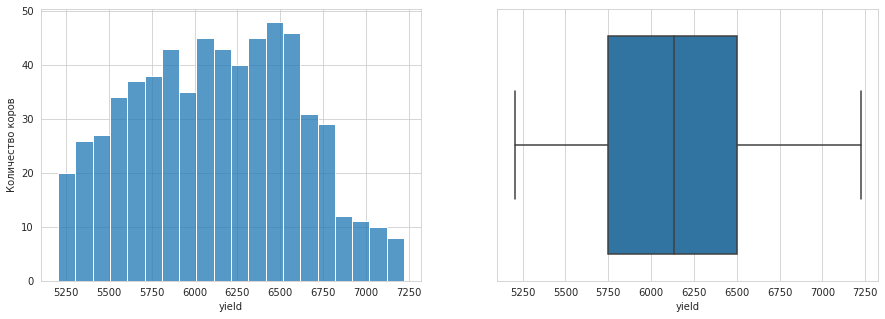

--------------------------------------------------
Статистика для fat_content:


count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

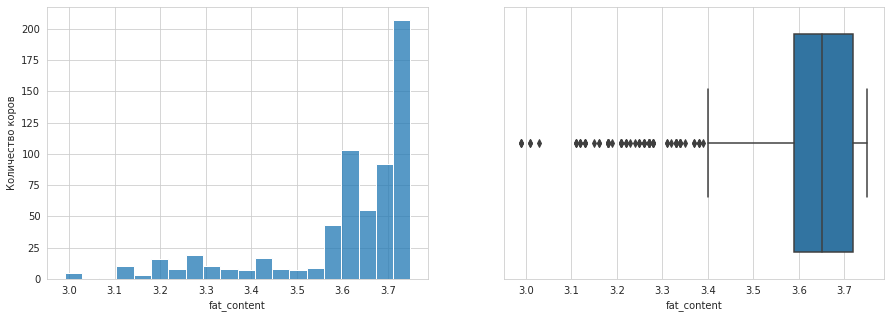

--------------------------------------------------
Статистика для protein:


count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

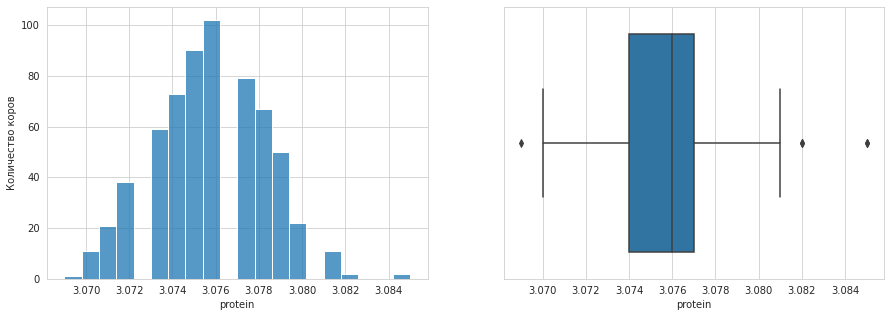

--------------------------------------------------
Статистика для efu:


count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: efu, dtype: float64

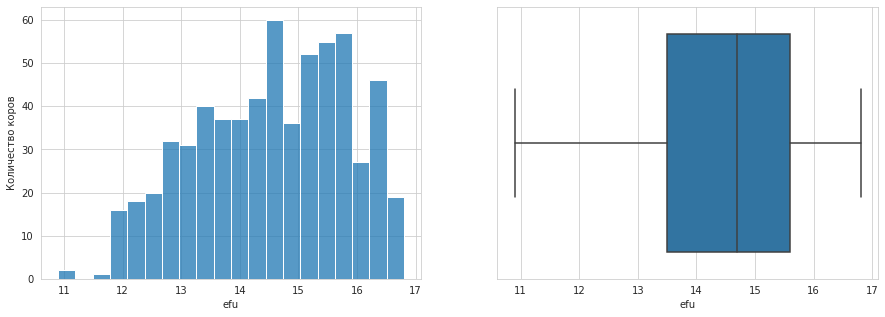

--------------------------------------------------
Статистика для raw_protein:


count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein, dtype: float64

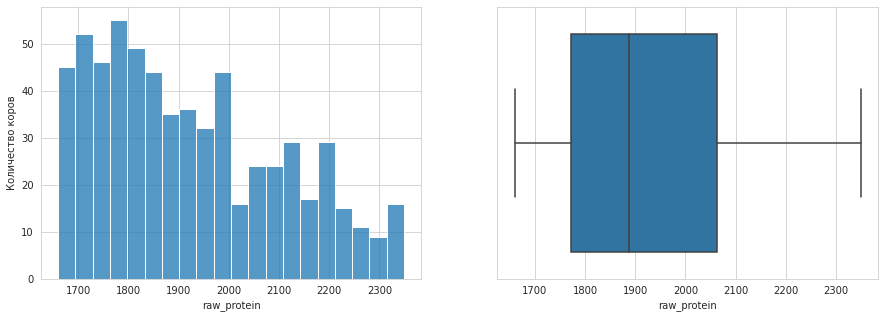

--------------------------------------------------
Статистика для spr:


count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spr, dtype: float64

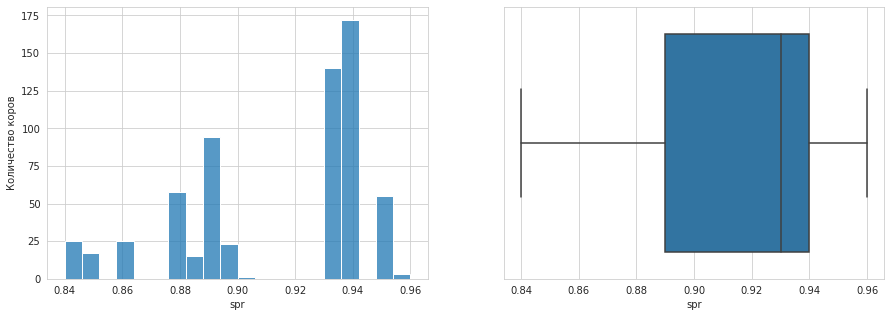

--------------------------------------------------


In [60]:
#запускаем количественные на основном датафрейме
analyze_numerical_features(df_main, quant_features)


Числовые данные для breed:


вис бик айдиал      372
рефлешн соверинг    256
Name: breed, dtype: int64

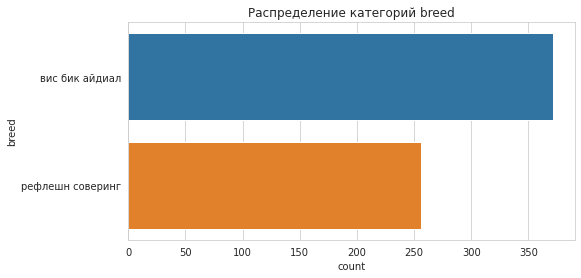

--------------------------------------------------
Числовые данные для dads_breed:


айдиал     317
соверин    311
Name: dads_breed, dtype: int64

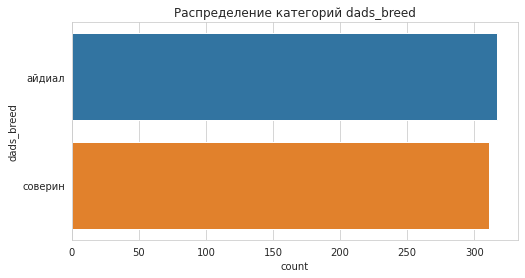

--------------------------------------------------
Числовые данные для age:


более_2_лет    518
менее_2_лет    110
Name: age, dtype: int64

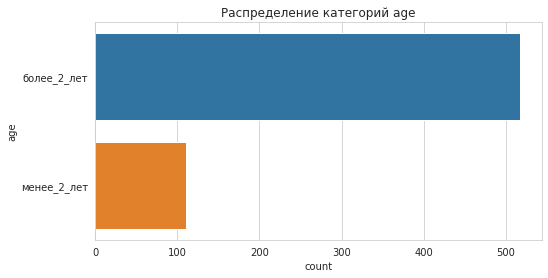

--------------------------------------------------
Числовые данные для type_pasture:


холмистое    350
равнинное    278
Name: type_pasture, dtype: int64

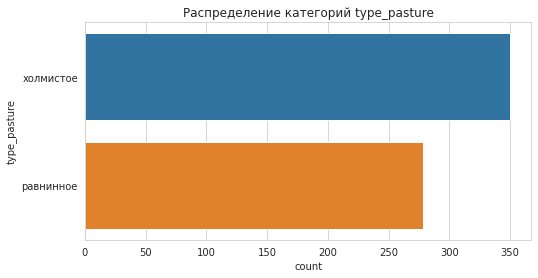

--------------------------------------------------


In [61]:
# Категориальные на 
analyze_categorical_features(df_main, cat_features)


In [62]:
# Посмотрим распределение всех коров по отцам.
dad_name = ['dads_name']


Числовые данные для dads_name:


барин       240
буйный      214
соловчик    110
геркулес     64
Name: dads_name, dtype: int64

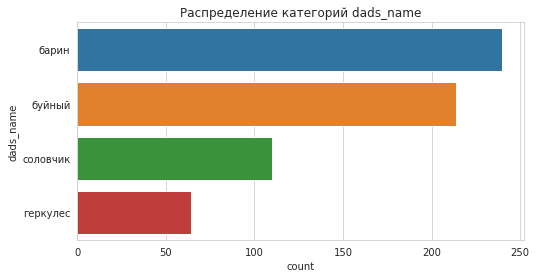

--------------------------------------------------


In [63]:
analyze_categorical_features(df_dad,dad_name)

In [64]:
#Теперь проанализируем данные о коровах на продажу:
df_cow_numerical=['fat_content','protein']

In [65]:
df_cow_cat_features =['breed','type_pasture','dads_breed','dads_name','age']

Статистика для fat_content:


count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: fat_content, dtype: float64

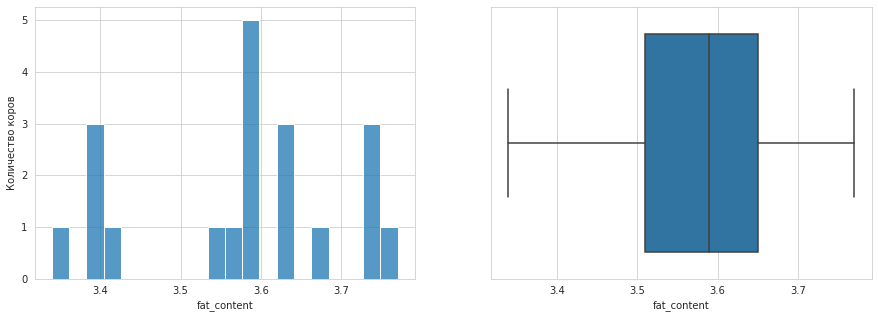

--------------------------------------------------
Статистика для protein:


count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: protein, dtype: float64

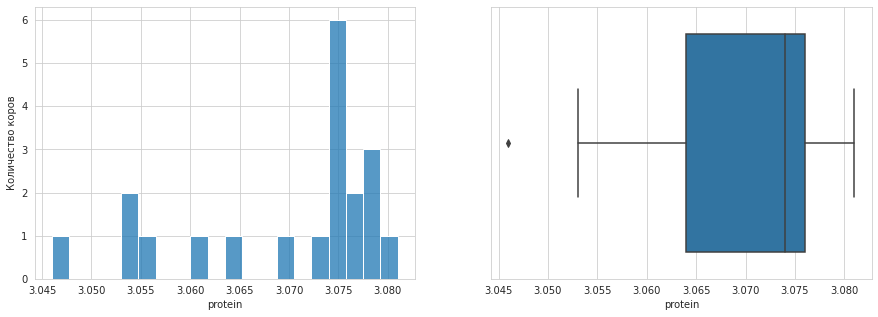

--------------------------------------------------


In [66]:
# посмотрим количественные признаки коров на продажу
analyze_numerical_features(df_cow, df_cow_numerical)


Числовые данные для breed:


рефлешн соверинг    11
вис бик айдиал       9
Name: breed, dtype: int64

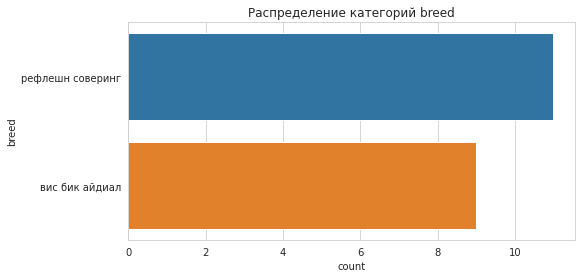

--------------------------------------------------
Числовые данные для type_pasture:


равнинное    11
холмистое     9
Name: type_pasture, dtype: int64

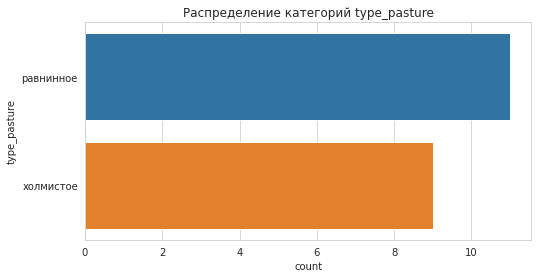

--------------------------------------------------
Числовые данные для dads_breed:


соверин    12
айдиал      8
Name: dads_breed, dtype: int64

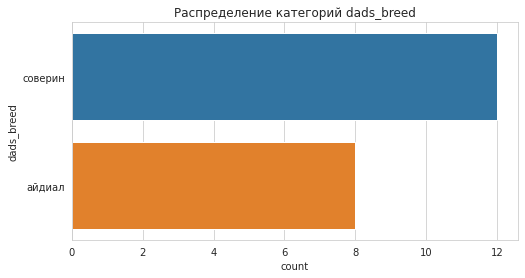

--------------------------------------------------
Числовые данные для dads_name:


буйный      8
геркулес    6
барин       4
соловчик    2
Name: dads_name, dtype: int64

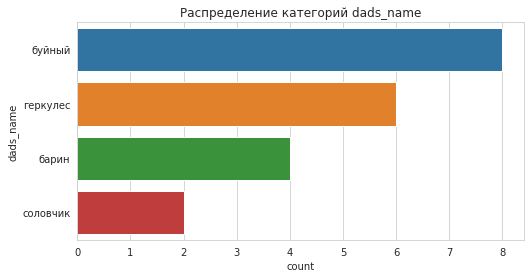

--------------------------------------------------
Числовые данные для age:


более_2_лет    15
менее_2_лет     5
Name: age, dtype: int64

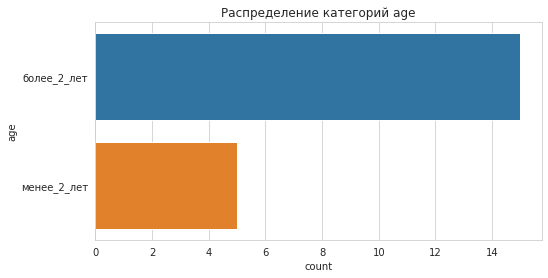

--------------------------------------------------


In [67]:
#И посмотрим распределение коров на продажу по отцам
analyze_categorical_features(df_cow,df_cow_cat_features)

### Выводы по исследованиюю данных:


#### По количественным переменным данных о стаде фермера на текущий момент:
- **Удой(yield):** нормальное распредление, чуть смещенно влево. За исключением выброса, который я вывел выше, все значения лежат в межквартильном размахе от 5751 до 6501. 
- **жирность (fat_content):** большая часть значений приходится на 3,6-3,7%.  Все что ниже 3.4 - явные выбросы. Надо подробней в дальнейшем изучить эти данные, возможно, есть корреляция с какими-то другими признаками. 
- **Белок (protein):** Нормальное распределение с пропусками. Еть несколько выбросов, но не критично.
- **Энергетическая кормовая единица(efu)**: Выбросов нет,распределение нормально со смещением вправо.
- **Сырой белок(raw_protein):** Нормальное распределение со смещением влево. Все значения без выбросов.
- **Сахаро-протеиновое соотношение(spr):** Нормальное расрпделение, со смещением вправо. Все значения без выбросов.

#### По категориальным переменным данных о стаде фермера на текущий момент
- **Порода(breed):** Представителей породы вис бик айдиал  больше чем рефлешн соверениг.
- **Порода папы быка(dads_breed):** Распределены практически одинаково.
- **Возраст(age):** Коров возрастом более 2х лет в два раза больше, чем тех, кому менее двухлет.
- **Тип пастбища(pasture_type):** Равнинное на одно значение больше. 

#### По распределению отцом коров:
- Больше всего отпрысков у Барина, меньше всего у Геркулеса

#### По коровам на продажу
##### Количественные
- Визуально все аналогично коровам фермера
##### Качественные
- Визуально все аналогично коровам фермера

## Корреляционный анализ

In [68]:
# Для начала выделим необходимые нам столбцы: 
numerical_columns = ['yield','efu','raw_protein','spr','fat_content','protein']

In [69]:
corr_matrix = df_main[numerical_columns].corr()

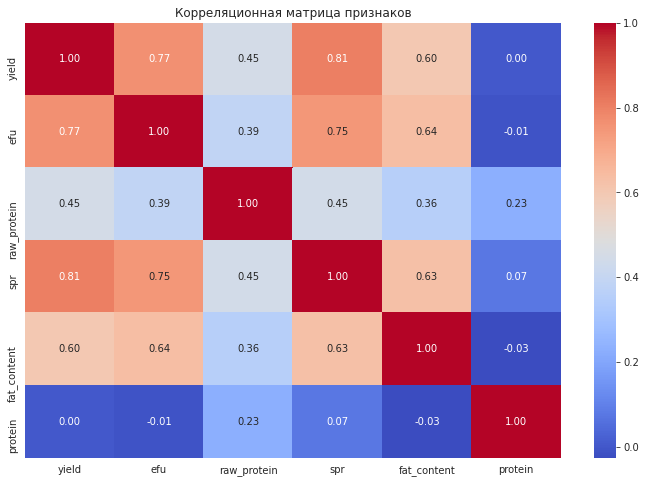

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

##### Вывод по матрице корреляции:
- Хорошо видно высокий коэффициент корреляции Пирсона с SPR(Сахаро-протеиновое соотношением), чуть ниже с efu(Энергетическая кормовая единица). Не сильные связи с fat_content(жирностью) и raw_protein(Сырой протеин).
- Хоть коррелция высокая, считать это мультиколлинеарностью нельзя(кэф не выше 0,9)
- Исходя из данного анализа, можно предположить, что показатель удоя зависит от корма буренок. Но это лишь поверхностная гипотеза, продолжим исследовать данные. 

#### Диаграммы рассеивания для признака удой с учетом значения категориальных признаков. 
- Я вижу решение так: так как действие повторяется, то мне нужна функция, которая принимает датафрейм, список количественных параметров и один категориальный признак. На основе него строится диаграмма. Напишем эту функцию:

In [71]:
def scatter_with_category(df, num_features, category_feature, target='yield'):
     for feature in num_features:
        if feature == target:
            continue  

        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=feature, y=target, hue=category_feature, alpha=0.7)
        plt.title(f"Удой vs {feature} (различия: {category_feature})")
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.legend(title=category_feature)
        plt.tight_layout()
        plt.show()

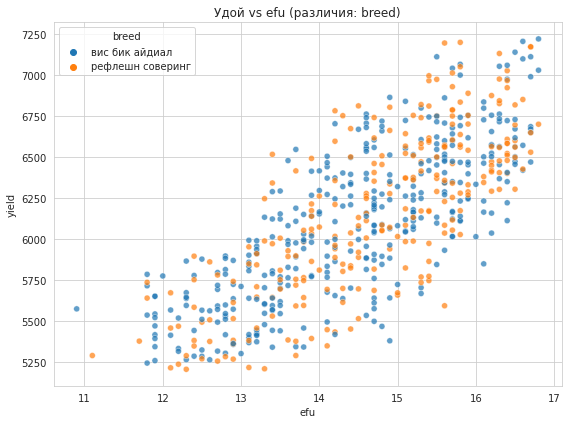

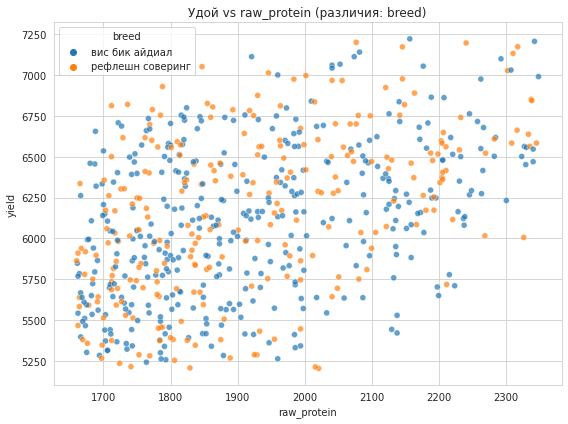

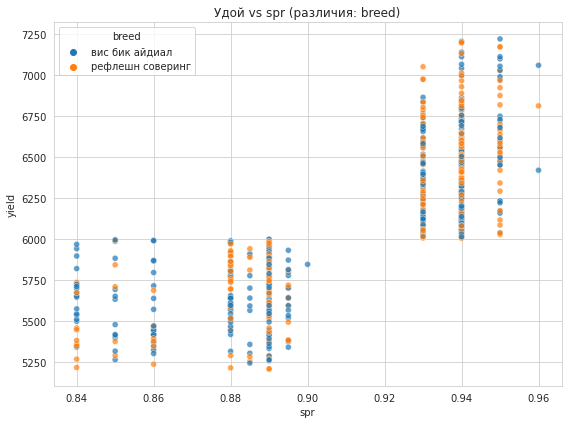

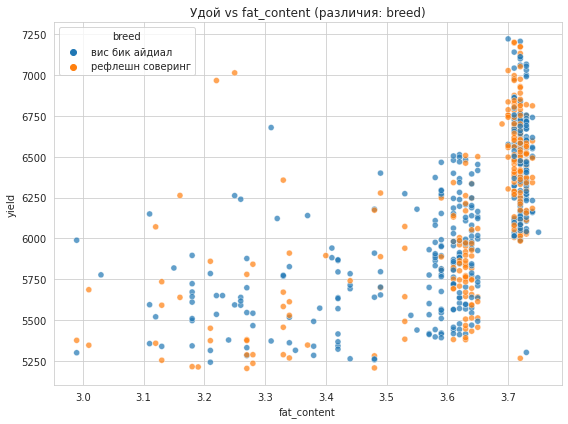

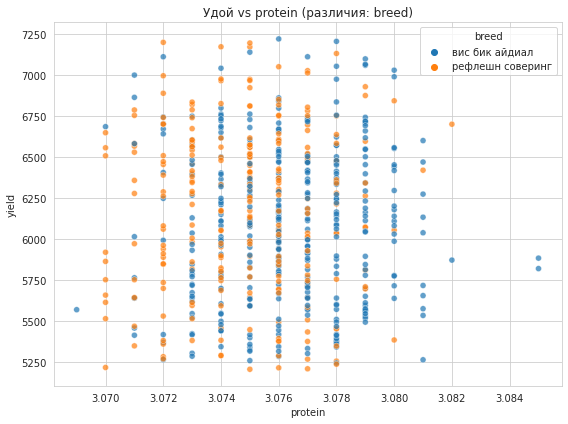

In [72]:
scatter_with_category(df_main, numerical_columns, category_feature='breed')

##### Вывод по различию целевого признака(удой) и входных в разрезе сравнения по породам:
- Визуально общая картина схожа
- Бросается в глаза различие в содержании белка: у породы Рефлешн Соверинг ниже, у Вис Бик Айдал, соответственно выше.

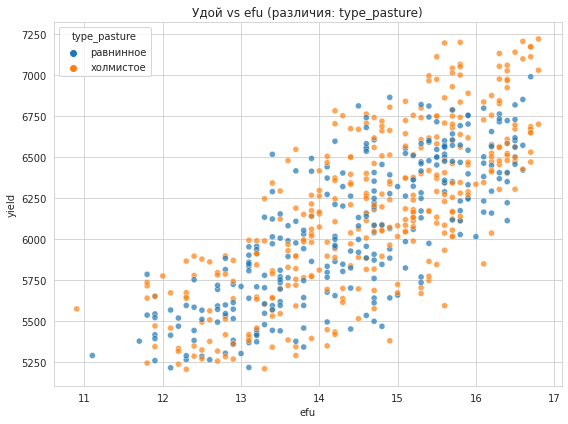

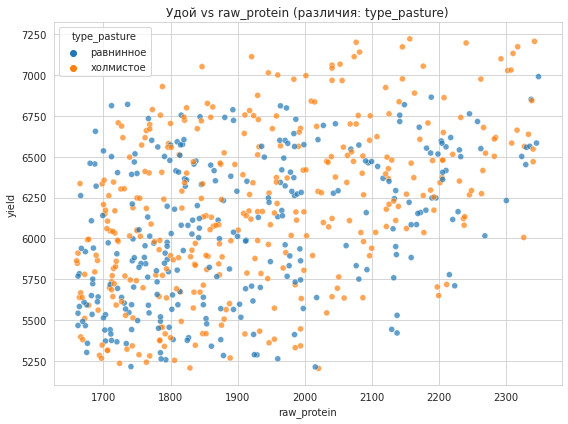

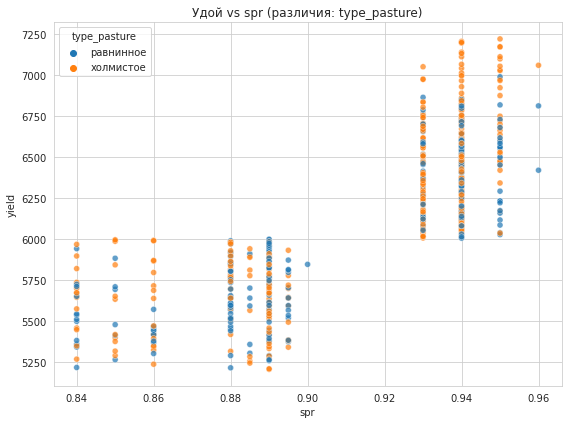

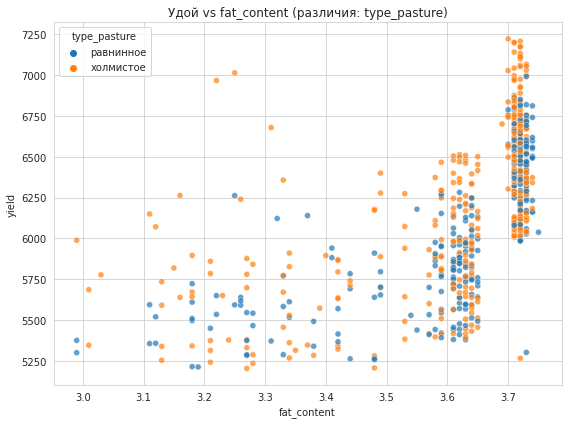

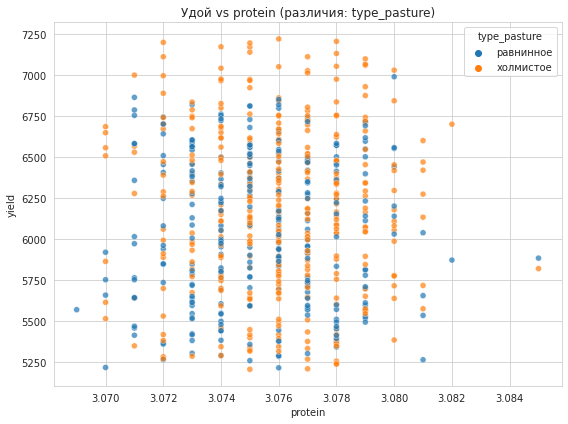

In [73]:
scatter_with_category(df_main, numerical_columns, category_feature='type_pasture')

##### Вывод по различию целевого признака(удой) и входных в разрезе сравнения по типу пастбища:
- Общая картина схожая, но рекордсмены по удою, ощутимо превышающие пастутся на холмистой местности


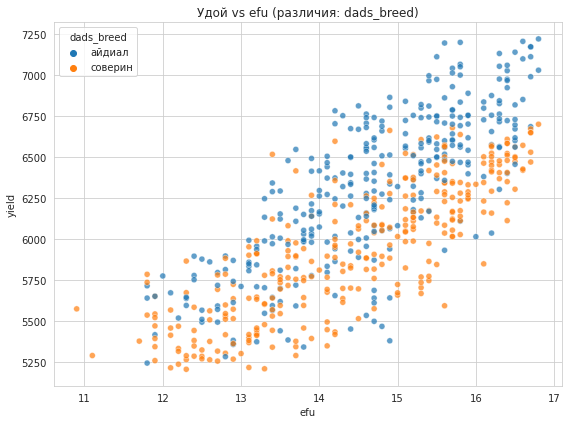

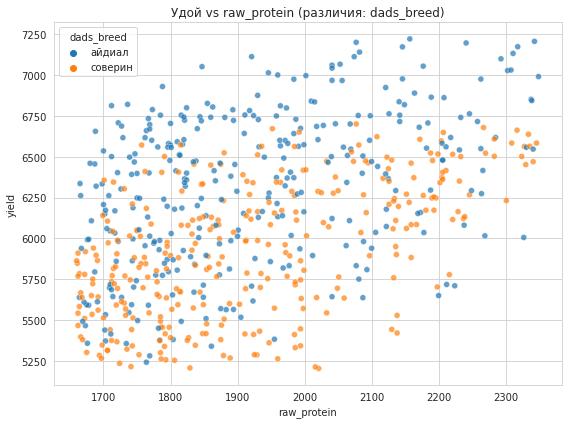

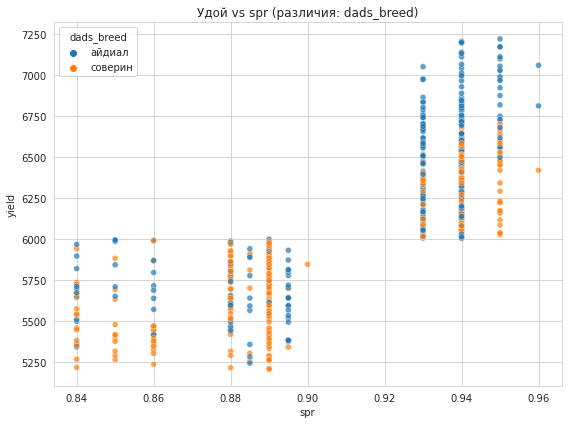

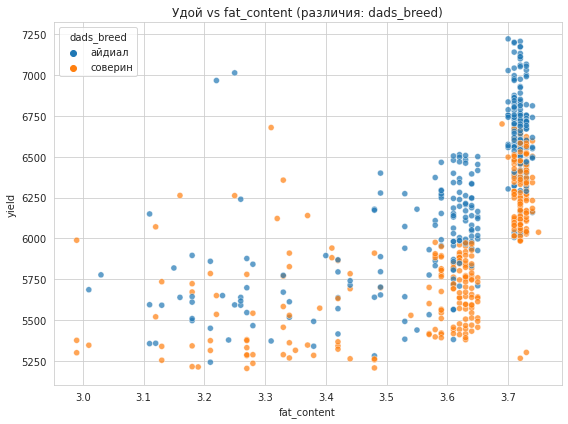

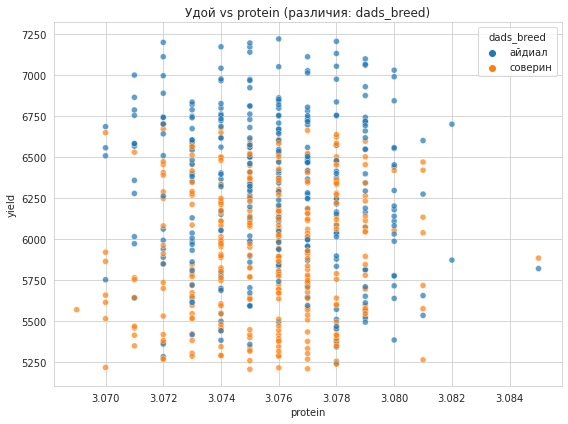

In [74]:
scatter_with_category(df_main, numerical_columns, category_feature='dads_breed')

##### Вывод по различию целевого признака(удой) и входных в разрезе сравнения по породам отца:
- Общие тренды +/- схожи. Но тут сильно выбивается по удою показатель породы отца Айдиал. 


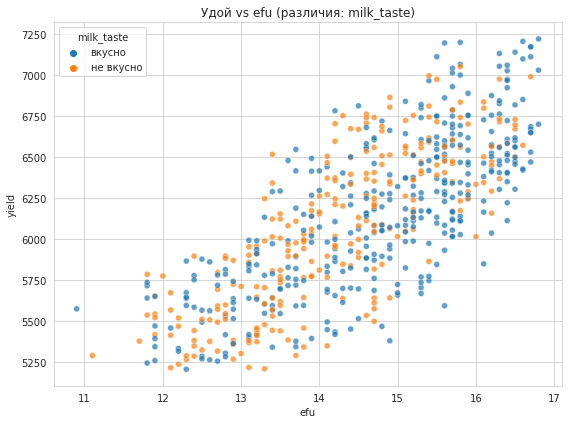

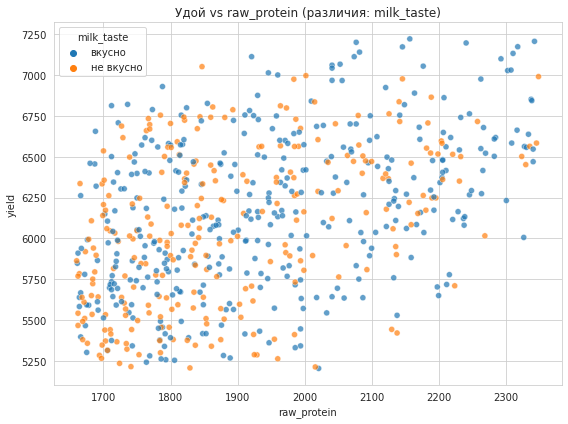

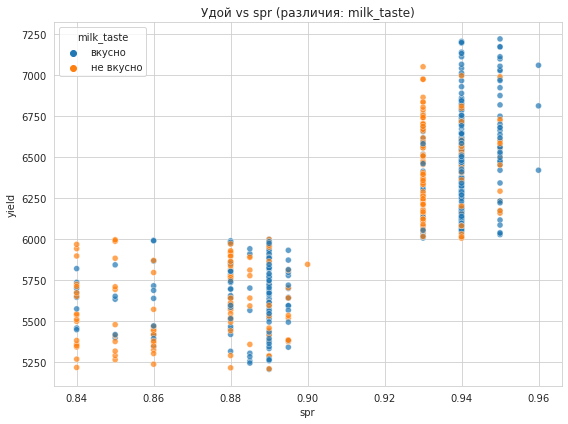

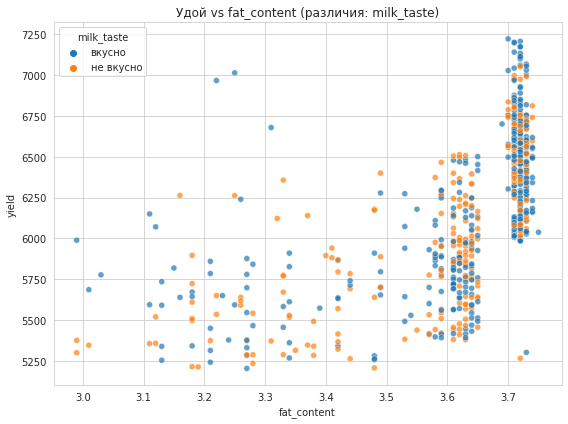

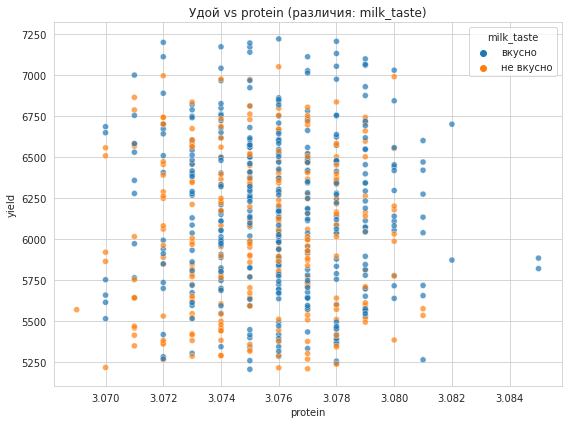

In [75]:
scatter_with_category(df_main, numerical_columns, category_feature='milk_taste')

##### Вывод по различию целевого признака(удой) и входных в разрезе сравнения по вкусу молока:
- Так же видна линейная зависимость и у + и - признака от efu(энергетической кормовой еденицы)
- Ощутимо видно, что при определенных значенрия spr молоко получается невкусным .И при низком содержании тоже.


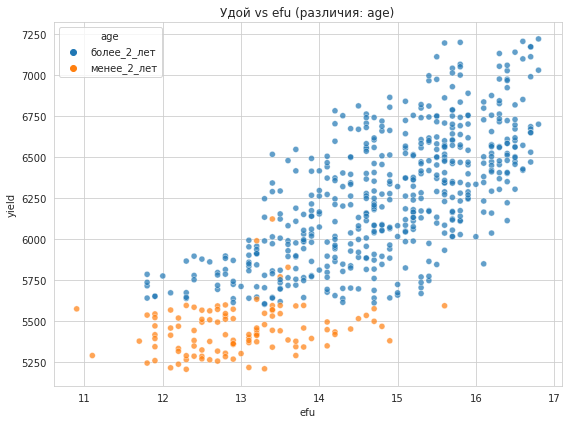

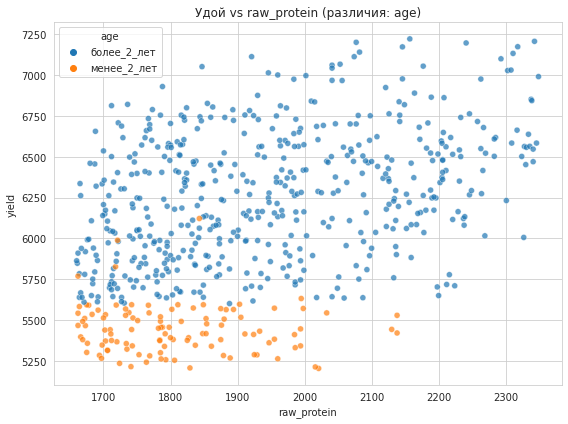

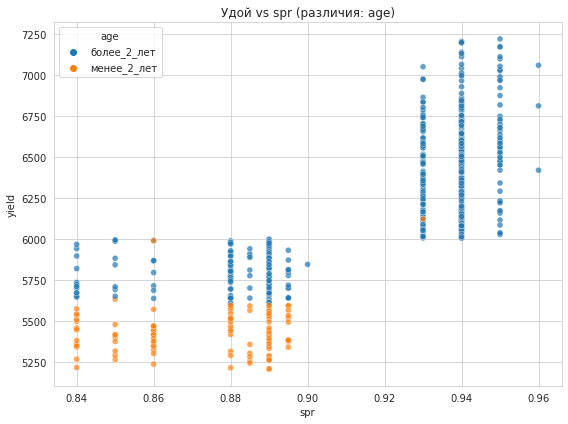

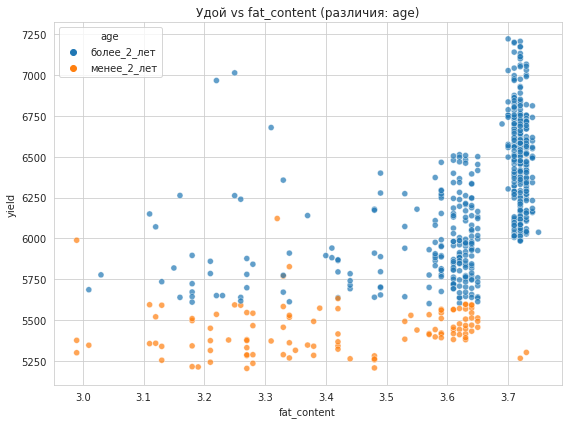

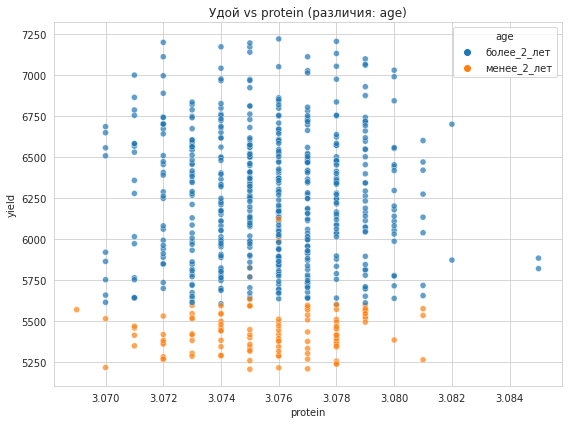

In [76]:
scatter_with_category(df_main, numerical_columns, category_feature='age')

##### Вывод по различию целевого признака(удой) и входных в разрезе сравнения по возрасту коров:
- Видно что коровы старше 2х лет дают больше молока, в котором больше жирности. 
- И коров которые старше 2х лет кормят более насыщенным кормом (ЭКЕ и СПО) 

### Общий вывод:

#### По кореляяции:

- Хорошо видно высокий коэффициент корреляции Пирсона с SPR(Сахаро-протеиновое соотношением), чуть ниже с efu(Энергетическая кормовая единица). Не сильные связи с fat_content(жирностью) и raw_protein(Сырой протеин).
- Хоть коррелция высокая, считать это мультиколлинеарностью нельзя(кэф не выше 0,9)
- Исходя из данного анализа, можно предположить, что показатель удоя зависит от корма буренок. Но это лишь поверхностная гипотеза, продолжим исследовать данные.

#### По диаграммам рассеивания с учетом категориальных признаков 
- Вузуально общий тренд схож.
- Бросается в глаза различие в содержании белка: у породы Рефлешн Соверинг ниже, у Вис Бик Айдал, соответственно выше.
- Рекордсмены по удою, ощутимо превышающие пастутся на холмистой местности.
- Выбиваеются по удою те особи, у которых отец породы Айдиал.
- По графику видно, чтокус молока зависит от признака от (энергетической кормовой еденицы, а так же наблюдается при определенных значенрия spr, что молоко получается невкусным. И при низком содержании тоже.
- Коровы старше 2х лет дают больше молока, в котором больше жирности. Но коров старше 2х лет кормят более насыщенным кормом (ЭКЕ и СПО).

#### Итого
Входными признаками для целевого признака удой мы возьмем: 
- Из количественных признаков: efu, spr, fat_content, raw_protein.  
- Из категориальных: breed,dads_breed, type_pasture, age. 


## Обучение модели линейной регрессии

#### Выглядит так, что стоит написать функцию. Принимающую в себя датасет, целевой признак и входные признаки. 

In [77]:
def linear_regress(data,target,numerical_columns,category_feature):
    #копируем датасет в переменную 
    df = data.copy()
    
    # проставляем константу
    RANDOM_STATE = 42
    
    # разбиваем признаки на входные и целевой
    X = df.drop(target,axis=1)
    y = df[target]
    
    # разбиваем данные на тренировочные и тестовые
    X_train, X_test, y_train, y_test =  train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
    )
    
    # Так как у нас в датасете есть категориальные и количественные прризнаки, данны надо подготовить
    # Кодируем категориальные признаки
    encoder = OneHotEncoder(drop='first', sparse=False)
    
    # Обучаем и преобразовываем категориальные признаки в обоих выборках
    X_train_ohe = encoder.fit_transform(X_train[category_feature])
    X_test_ohe = encoder.transform(X_test[category_feature])
    
    # Сохраним в переменную названия новых столбцов
    encoder_col_names = encoder.get_feature_names(category_feature)

    # Соберем в датасет
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    # Теперь масштабируем количественные данные
    scaler = StandardScaler()
    
    X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
    X_test_scaled = scaler.transform(X_test[numerical_columns])
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_columns)
    
    # Надо соеденить датасеты:
    X_train_final= pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test_final = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # Инициалилизируем модель
    model_lr = LinearRegression()
    
    # Обучим ее
    model_lr.fit(X_train_final, y_train)
    
    # Итого
    predictions = model_lr.predict(X_test_final)

    return model_lr, predictions, y_test, encoder, scaler
    

In [78]:
# Запишем столбцы для модели
numerical_columns_for_lr = ['efu','raw_protein','spr','fat_content']
catrgorial_columns_for_lr = ['breed','dads_breed', 'type_pasture','age']
target = 'yield'

In [79]:
# тестим
model_lr_1, predictions_1, y_true_1, encoder_1, scaler_1 = linear_regress(df_main,target,numerical_columns_for_lr,catrgorial_columns_for_lr)

In [80]:
# Выводы делать рано, надо оценить эффективность модели. 
# Найдем коэффициент детерминации R²
# Для этого набросаем функцию:
def r2_koef(y_true, y_pred ):
    r2 = r2_score(y_true, y_pred)
    return print('Коэффицент детерминации равен: ', r2)

In [81]:
r2_lr1 = r2_koef(y_true_1,predictions_1)

Коэффицент детерминации равен:  0.7840491770333318


In [82]:
# Оберну в функции другие метрики и помсмотрю: 

def mse_koef(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return print('Средняя квадратическая ошибка MSE равна: ', mse)

def mae_koef(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return print('Средняя абсолютная ошибка MAЕ равна: ', mae)

def rme_koef(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return print('Корень средней квадратической ошибки RMSE равен: ',rmse)

In [83]:
mse_koef(y_true_1,predictions_1)
mae_koef(y_true_1,predictions_1)
rme_koef(y_true_1,predictions_1)


Средняя квадратическая ошибка MSE равна:  43960.021611301665
Средняя абсолютная ошибка MAЕ равна:  163.61998797909644
Корень средней квадратической ошибки RMSE равен:  209.6664532329902


In [84]:
# Соберем в датафрейм через функцию:
def get_residuals_df(y_true, y_pred):
    df = pd.DataFrame({
        'y_test': y_true,
        'predictions': y_pred
    })
    df['residuals'] = df['y_test'] - df['predictions']
    return df
    
    

    

In [85]:
r1_df_1 = get_residuals_df(y_true_1, predictions_1)
r1_df_1                       

,y_test,predictions,residuals
582,5980,6058.074700,-78.074700
592,6512,6426.089082,85.910918
551,5392,5497.788217,-105.788217
214,5604,5672.602468,-68.602468
486,5667,5981.925984,-314.925984
...,...,...,...
84,6686,6686.458536,-0.458536
285,6967,6498.806862,468.193138
577,6248,6485.172450,-237.172450
80,5640,6173.050719,-533.050719


In [86]:
# Визуализируем остатки
def plot_residuals(df, residual_col='residuals'):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[residual_col], bins=30, kde=True, color='skyblue')
    plt.axvline(0, color='red', linestyle='--')
    plt.title('Распределение остатков (residuals)')
    plt.xlabel('Остатки')
    plt.ylabel('Количество')
    plt.grid(True)
    plt.show()

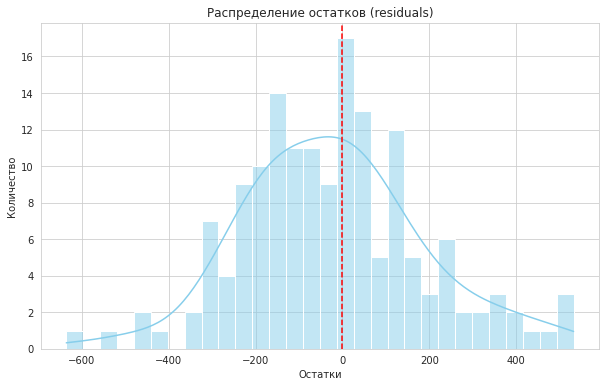

In [87]:
plot_residuals(r1_df_1)

#### Вывод: 
- Мы видим хорошую нормальную точность,коэффициент детерминации равен 0.74. Модель хорошо себя показывает в 74% случаев.
- Остатки распределены нормально, пик приходится на ноль. Но видно что все же график неравномерен(падение около нуля в минусовой части, паделние в районе 100-180 в положительной части. 
- Есть хвост вправо, скорей всего не учтен какой-то признак или же пропущен выброс. 

### Обучение второй модели линейной регрессии

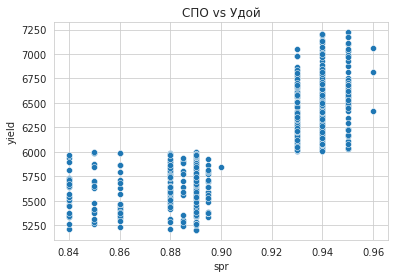

In [88]:
# Посмотрим еще раз на диаграмму рассеивания:
sns.scatterplot(data=df_main, x='spr', y='yield')
plt.title('СПО vs Удой')
plt.show()

In [89]:
# Из нее хорошо видно, что все что выше 0,92,  там удой выше 6000. Копируем главный датафрейм в резерв:
df_main_2lr = df_main.copy()

In [90]:
df_main_2lr['spr_bin'] = (df_main_2lr['spr'] > 0.92).astype(int)


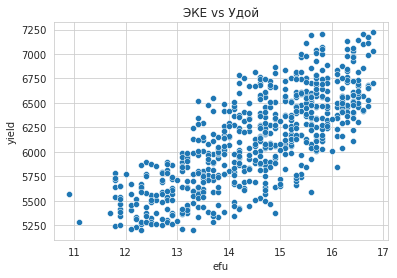

In [91]:
# посмотрим на ЭКЕ (Энергетическая кормовая единица) и удой еще раз:
sns.scatterplot(data=df_main, x='efu', y='yield')
plt.title('ЭКЕ vs Удой')
plt.show()


In [92]:
# Честно говоря, не вижу тут нелинейности.. Но попробуем:
df_main_2lr['efu_squared'] = df_main_2lr['efu'] ** 2


In [93]:
# Соберем новые списки необходим столбцов, количественных и категориальных:
numerical_columns_for_lr_v2 = ['raw_protein', 'efu_squared']
cat_columns_for_lr_v2 = ['breed', 'dads_breed', 'type_pasture', 'age', 'spr_bin']


In [94]:
# тестим вторую модель:
model_v2, predictions_v2, y_test_v2, encoder_v2, scaler_v2 = linear_regress(
    df_main_2lr,
    target='yield',
    numerical_columns=numerical_columns_for_lr_v2,
    category_feature=cat_columns_for_lr_v2
)


In [95]:
print("R² первой модели:", r2_score(y_true_1, predictions_1))
print("R² второй модели:", r2_score(y_test_v2, predictions_v2))

R² первой модели: 0.7840491770333318
R² второй модели: 0.8180879926867501


In [96]:
mse_koef(y_test_v2, predictions_v2)
mae_koef(y_test_v2, predictions_v2)
rme_koef(y_test_v2, predictions_v2)

Средняя квадратическая ошибка MSE равна:  37030.91131113697
Средняя абсолютная ошибка MAЕ равна:  149.03965222364604
Корень средней квадратической ошибки RMSE равен:  192.43417396901458


In [97]:
# Соберем остатки в датафрейм для дальнейшей вузуализиции 
r1_df_2 = get_residuals_df(y_test_v2, predictions_v2)


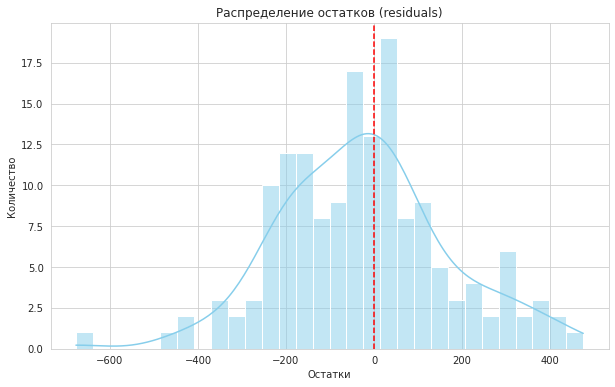

In [98]:
plot_residuals(r1_df_2)

#### Модель стала точнее и теперь ошибается в 21% случаев. Есть скаче в районе -175. Есть значения за -600 и 600 соответсвенно. Но график нормализуется. Продолжим исследование.

### Обучение третьей модели линейной регрессии

In [99]:
# мы учтем улучшения второй модели, поэтому датасет берем из под нее
df_main_2lr = df_main_2lr.merge(df_dad, on='id')

In [100]:
df_main_2lr

,id,yield,efu,raw_protein,spr,breed,type_pasture,dads_breed,fat_content,protein,milk_taste,age,spr_bin,efu_squared,dads_name
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,соловчик
2,3,5810,14.0,1854,0.885,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,барин
3,4,5895,12.4,2012,0.885,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,рефлешн соверинг,равнинное,айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.16,буйный
624,626,5513,12.9,1700,0.880,рефлешн соверинг,равнинное,соверин,3.64,3.073,вкусно,менее_2_лет,0,166.41,барин
625,627,5970,14.4,1837,0.880,рефлешн соверинг,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,0,207.36,барин
626,628,5746,13.8,1994,0.890,рефлешн соверинг,равнинное,соверин,3.64,3.077,вкусно,более_2_лет,0,190.44,барин


In [101]:
# Добавим в список имя отца:
numerical_columns_for_lr_v2 = ['raw_protein', 'efu_squared']
cat_columns_for_lr_v2 = ['breed', 'dads_breed', 'type_pasture', 'age', 'spr_bin','dads_name']

In [102]:
# тестим третью модель:
model_v3, predictions_v3, y_test_v3, encoder_v3, scaler_v3 = linear_regress(
    df_main_2lr,
    target='yield',
    numerical_columns=numerical_columns_for_lr_v2,
    category_feature=cat_columns_for_lr_v2
)

In [103]:
print("R² первой модели:", r2_score(y_true_1, predictions_1))
print("R² второй модели:", r2_score(y_test_v2, predictions_v2))
print("R² третьей модели:", r2_score(y_test_v3, predictions_v3))

R² первой модели: 0.7840491770333318
R² второй модели: 0.8180879926867501
R² третьей модели: 0.8247542745210406


In [104]:
mse_koef(y_test_v3, predictions_v3)
mae_koef(y_test_v3, predictions_v3)
rme_koef(y_test_v3, predictions_v3)

Средняя квадратическая ошибка MSE равна:  35673.88988618195
Средняя абсолютная ошибка MAЕ равна:  146.16302445362314
Корень средней квадратической ошибки RMSE равен:  188.8753289505592


In [105]:
r1_df_3 = get_residuals_df(y_test_v3, predictions_v3)

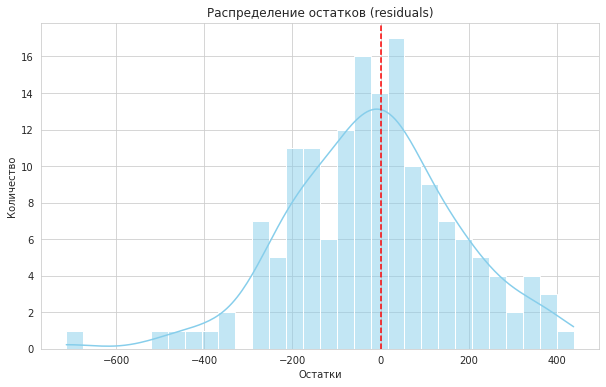

In [106]:
plot_residuals(r1_df_3)

In [107]:
r2_lr1 = r2_koef(y_test_v3,predictions_v3)

Коэффицент детерминации равен:  0.8247542745210406


##### Третья модель стала еще точнее. Но не значительно. 

In [108]:
# Расчитаем доверительный интервал:
interval = st.norm.interval(
    confidence=0.95,
    loc=np.mean(predictions_v3),
    scale=st.sem(predictions_v3)
)

In [109]:
print(f'95% доверительный интервал ошибки: {interval[0]:.2f} — {interval[1]:.2f}')

95% доверительный интервал ошибки: 6092.34 — 6221.38


### Спрогнозируем удой коров, которых фермер хочет купить используя третью модель

In [110]:
# Произведем изменения с датафреймом df_cow в соответствии с заданием
# добавление ЭКЕ, увеличенного на 5%, в df_cow
df_cow['efu'] = (df_main_2lr ['efu'].mean() * 1.05).round(2)

In [111]:
# возведем ЭКЕ в квадрат
df_cow['efu_squared'] = (df_cow['efu']**2).round(2)
df_cow['raw_protein'] = (df_main_2lr ['raw_protein'].mean() * 1.05).round(2)
df_cow['spr'] = df_main['spr'].mean() * 1.05

In [112]:
# замена spr на бинарный тип
df_cow['spr_bin'] = df_cow['spr'].apply(lambda x: 1 if x > 0.9 else 0)

In [113]:
numerical_columns_for_lr_total = ['raw_protein', 'efu_squared']
cat_columns_for_lr_total = ['breed', 'dads_breed', 'type_pasture', 'age', 'spr_bin','dads_name']

In [114]:
# Из третьей модели у нас есть сама модель, энкодер и масштабировщик:
# model_v3, encoder_v3, scaler_v3
# Надо обработать датасет в соответствии с ними
X_cat = df_cow[cat_columns_for_lr_total ]
X_cat_encoded = encoder_v3.transform(X_cat)
X_cat_encoded = pd.DataFrame(
    X_cat_encoded,
    columns=encoder_v3.get_feature_names(cat_columns_for_lr_total ),
    index=df_cow.index
)


In [115]:
# обработаем числовые признаки:
X_num = df_cow[numerical_columns_for_lr_total]
X_num_scaled = scaler_v3.transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=numerical_columns_for_lr_total, index=df_cow.index)

In [116]:
X_final = pd.concat([X_cat_encoded, X_num_scaled], axis=1)

In [117]:
predicted_yield = model_v3.predict(X_final)

In [118]:
# Добавим столбец к датафрейму:
df_cow['predicted_yield'] = predicted_yield


In [119]:
df_cow

,breed,type_pasture,dads_breed,dads_name,fat_content,protein,age,efu,efu_squared,raw_protein,spr,spr_bin,predicted_yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.28,233.48,2019.95,0.958744,1,6610.434056
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.28,233.48,2019.95,0.958744,1,6379.225787
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,1,6284.514534
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.28,233.48,2019.95,0.958744,1,6593.604135
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,1,6542.660825
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.28,233.48,2019.95,0.958744,1,6425.894976
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.28,233.48,2019.95,0.958744,1,6610.434056
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.28,233.48,2019.95,0.958744,1,6571.774496
8,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,1,6284.514534
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.28,233.48,2019.95,0.958744,1,6401.055426


In [120]:

df_cow[df_cow['predicted_yield'] > 6000]

,breed,type_pasture,dads_breed,dads_name,fat_content,protein,age,efu,efu_squared,raw_protein,spr,spr_bin,predicted_yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.28,233.48,2019.95,0.958744,1,6610.434056
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.28,233.48,2019.95,0.958744,1,6379.225787
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,1,6284.514534
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.28,233.48,2019.95,0.958744,1,6593.604135
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,1,6542.660825
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.28,233.48,2019.95,0.958744,1,6425.894976
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.28,233.48,2019.95,0.958744,1,6610.434056
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.28,233.48,2019.95,0.958744,1,6571.774496
8,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.28,233.48,2019.95,0.958744,1,6284.514534
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.28,233.48,2019.95,0.958744,1,6401.055426


### Вывод: 
- Мы взяли самую успешную модель линейной регрессии, с коэффицентом детерминации 0.80
- Применили ее к датафрейму с коровами на продажу. И можем отобрать успешных коров для феремера. 
- Исходя из данных модели, все коровы будут давать более 6000 литров молока в год.
- Далее настроим модель логистической регрессии, что бы удовлетворить второе условие.

## Обучение модели логистической регрессии

### Определимся с действиями:
- У нас есть датасет с подготовленными данными: df_main_2lr 
- Надо возраст и вкус молока привести к понтным системе вещам : сделать их бинарными. Так как там всего два значения, сделаю это вручную. 
- А далее на этих данных обучить модель

In [121]:
# Но я на всякий случай помещу его в отдельную переменную: 
df_for_logr = df_main_2lr.copy()

In [122]:
df_for_logr['milk_taste'] = df_for_logr['milk_taste'].apply(lambda x: 1 if x == 'вкусно' else 0)

In [123]:
# Закомментруем, но оставим напамять))
#df_for_logr['age'] = df_for_logr['age'].apply(lambda x: 1 if x == 'более_2_лет' else 0)

In [124]:
# Что ж, соберем функцию: 
def logic_regress(data,target,numerical_columns,category_feature):
    #копируем датасет в переменную 
    df = data.copy()
    
    # проставляем константу
    RANDOM_STATE = 42
    
    # разбиваем признаки на входные и целевой
    X = df.drop(target,axis=1)
    y = df[target]
    
    # разбиваем данные на тренировочные и тестовые
    X_train, X_test, y_train, y_test =  train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
    )
    
       # Кодируем категориальные признаки
    encoder = OneHotEncoder(drop='first', sparse=False)
    
    # Обучаем и преобразовываем категориальные признаки в обоих выборках
    X_train_ohe = encoder.fit_transform(X_train[category_feature])
    X_test_ohe = encoder.transform(X_test[category_feature])
    
    # Сохраним в переменную названия новых столбцов
    encoder_col_names = encoder.get_feature_names(category_feature)

    # Соберем в датасет
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
    # Теперь масштабируем количественные данные
    scaler = StandardScaler()
    
    X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
    X_test_scaled = scaler.transform(X_test[numerical_columns])
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_columns)
    
    # Надо соеденить датасеты:
    X_train_final= pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test_final = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    model_logr = LogisticRegression()
    model_logr.fit(X_train_final, y_train)
    
    # Итого
    predictions = model_logr.predict(X_test_final)

    return model_logr, predictions, y_test, encoder, scaler, X_test_final

In [125]:
def koef_for_log_reg(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred).round(2)
    prec = precision_score(y_true, y_pred).round(2)
    rec = recall_score(y_true, y_pred).round(2)
    print(" Оценка модели:")
    print(f" Accuracy: {acc}")
    print(f" Precision: {prec}")
    print(f" Recall: {rec}")
    
    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Предсказано')
    plt.ylabel('Фактически')
    plt.title('Матрица ошибок')
    plt.tight_layout()
    plt.show()
    
    

In [126]:
model_logr, y_pred_4, y_test_4, encoder_log, scaler_log, x_test_log = logic_regress(df_for_logr,'milk_taste', numerical_columns_for_lr_total, cat_columns_for_lr_total)

 Оценка модели:
 Accuracy: 0.62
 Precision: 0.61
 Recall: 0.86


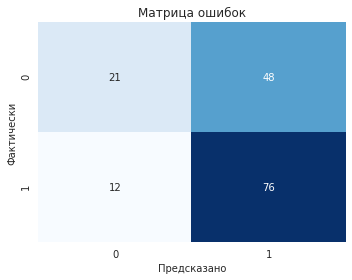

In [127]:
koef_for_log_reg(y_test_4,y_pred_4)

### Обучение второй модели линейной регрессии

### Вывод: 
- Мы получили модель логистической регрессии и ее метрики.
- Модель не очень точно предсказывает: 74 раза она предсказала вкусное молоко и оно таким оказалось (True Positive)
- 44 раза предсказала вкусное, а оно оказалось невкусным. Это ошибка 1-ого рода. 
- и 21 раз предсказала невкусное верно (True Negative)  
- 20 раз ошиблась, предсказала невкусное, когда оно на самом деле вкусное. Это ошибка 2-ого рода.
- Метрика Precision ниже, чем Recall: только 63 % было действительно вкусным. (точность). Но  полнота(recall) равна 79%, что модель нашла 79% действительно вкусного молока.
- Заказчику важнее метка Precision, так как ему критично, что бы молоко было вкусное. 
- Надо изменить порог принадлежности к классам, что бы модель подходила под наши нужды.


In [128]:
# На этом этапе, я понял, что мне нужно получить параметр, который моя функция не возвращает. 
# Поэтому я сейчас поднялся выше и подкорректировал функцию
y_probs = model_logr.predict_proba(x_test_log)[:, 1] 


In [129]:
# Соберем данные по порогу принадлежности, выведем топ 5:
data_for_thresholds = pd.DataFrame({
    'y_valid': y_test_4.values,  # сброс индекса, если нужно
    'y_proba': y_probs
}).sort_values(by='y_proba', ascending=False)

In [130]:
thresholds = [round(i, 3) for i in np.linspace(0.1, 1, 1000, endpoint=False)]


In [131]:

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    preds = (data_for_thresholds['y_proba'] >= i).astype(int)
    cm = confusion_matrix(data_for_thresholds['y_valid'], preds)
    if cm[0][1] == 0:  
        precision = precision_score(data_for_thresholds['y_valid'], preds)
        print(f"Порог: {i} | Precision: {precision:.2f} | TP: {cm[1][1]} | Recall: {round(cm[1][1] / (cm[1][1] + cm[1][0] + 1e-9), 2)}")
        porog = i
        break

Порог: 0.814 | Precision: 1.00 | TP: 8 | Recall: 0.09


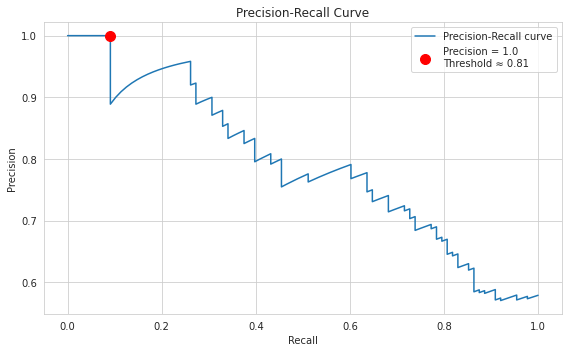

In [132]:
# Получаем кривую precision-recall
precision, recall, thresholds = precision_recall_curve(y_test_4, y_probs)

# Найдём индекс, где precision = 1 (или максимально близко)
precision_target = 1.0
idx = np.where(precision == precision_target)[0]

# Если таких нет, берём ближайшее максимальное значение
if len(idx) == 0:
    idx = [np.argmax(precision)]

recall_at_precision_1 = recall[idx[0]]
threshold_at_precision_1 = thresholds[idx[0]]

# Рисуем график
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(recall, precision, label='Precision-Recall curve')
ax.scatter(recall_at_precision_1, precision_target, color='red', s=100,
           label=f'Precision = 1.0\nThreshold ≈ {threshold_at_precision_1:.2f}', zorder=5)

ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

#### Вывод:
- Мы нашли такой порог прохождения, при котором Precision = 1, что означает, что модель никогда не ошибается в выборе вкусного молока.

In [133]:
# Отлично, теперь напишем функцию, которая позволит эксперементировать со порогом прохождения:
def experiment_with_threshold(model, X_test, y_test, threshold=0.5):
    # Получаем вероятности для класса 1
    y_probs = model.predict_proba(X_test)[:, 1]

    # Применяем порог
    y_pred_thresholded = (y_probs >= threshold).astype(int)

    # Выводим метрики
    print(f"\n Оценка модели при пороге {threshold}:")
    print("Accuracy:", accuracy_score(y_test, y_pred_thresholded).round(2))
    print("Precision:", precision_score(y_test, y_pred_thresholded).round(2))
    print("Recall:", recall_score(y_test, y_pred_thresholded).round(2))

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred_thresholded)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Предсказано')
    plt.ylabel('Фактически')
    plt.title(f'Матрица ошибок при пороге {threshold}')
    plt.show()



 Оценка модели при пороге 0.78:
Accuracy: 0.54
Precision: 0.94
Recall: 0.19


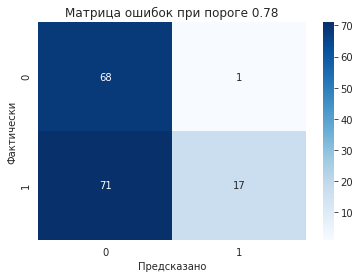

In [134]:
experiment_with_threshold(model_logr, x_test_log, y_test_4, threshold=0.78)

#### Вывод: Методом подбора, при пороге 0.78, модель точно определяет вкусное молоко. Не ошибается вообще. 


### Используем модель на практике: 
Из модели логистической регрессии у нас есть сама модель, энкодер и масштабировщик и порог: model_v3, encoder_v3, scaler_v3. Надо обработать датасет в соответствии с ними


In [135]:
df_cow.columns

Index(['breed', 'type_pasture', 'dads_breed', 'dads_name', 'fat_content',
       'protein', 'age', 'efu', 'efu_squared', 'raw_protein', 'spr', 'spr_bin',
       'predicted_yield'],
      dtype='object')

In [136]:
numerical_columns_for_lr_total, cat_columns_for_lr_total

(['raw_protein', 'efu_squared'],
 ['breed', 'dads_breed', 'type_pasture', 'age', 'spr_bin', 'dads_name'])

In [140]:
# Надо в датасете обработать столбцы:
df_cow['age'] = df_cow['age'].apply(lambda x: 1 if x == 'более_2_лет' else 0)

In [141]:
cat_columns_for_lr_total

['breed', 'dads_breed', 'type_pasture', 'age', 'spr_bin', 'dads_name']

In [142]:
print(X_cat.dtypes)

breed           object
dads_breed      object
type_pasture    object
age              int64
spr_bin          int64
dads_name       object
dtype: object


In [153]:
# Тут я просто убедился, что столбцы сета и столбцы на которых я учил модель совпадают и можем запускаться:
# артефакты из функции: model_logr, y_pred_4, y_test_4, encoder_log, scaler_log, x_test_log
# Надо обработать датасет в соответствии с ними
X_cat = df_cow[cat_columns_for_lr_total]
X_cat_encoded = encoder_log.transform(X_cat)
X_cat_encoded = pd.DataFrame(
    X_cat_encoded,
    columns=encoder_log.get_feature_names(cat_columns_for_lr_total ),
    index=df_cow.index
)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [144]:
# обработаем числовые признаки:
X_num = df_cow[numerical_columns_for_lr_total]
X_num_scaled = scaler_log.transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=numerical_columns_for_lr_total, index=df_cow.index)

In [145]:
X_final = pd.concat([X_cat_encoded, X_num_scaled], axis=1)

In [146]:
# тут я понял, что мне нужна функция с кастомным порогом
def predict_with_threshold(model, X, threshold=0.5):
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    return y_pred

In [147]:
predicted_taste_milk = predict_with_threshold(model_logr, X_final, threshold=0.78)


In [148]:
df_cow['predicted_taste_milk'] = predicted_taste_milk

In [149]:
df_cow

,breed,type_pasture,dads_breed,dads_name,fat_content,protein,age,efu,efu_squared,raw_protein,spr,spr_bin,predicted_yield,predicted_taste_milk
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,0,15.28,233.48,2019.95,0.958744,1,6610.434056,0
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,0,15.28,233.48,2019.95,0.958744,1,6379.225787,0
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,0,15.28,233.48,2019.95,0.958744,1,6284.514534,0
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,0,15.28,233.48,2019.95,0.958744,1,6593.604135,0
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,0,15.28,233.48,2019.95,0.958744,1,6542.660825,0
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,0,15.28,233.48,2019.95,0.958744,1,6425.894976,0
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,0,15.28,233.48,2019.95,0.958744,1,6610.434056,0
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,0,15.28,233.48,2019.95,0.958744,1,6571.774496,0
8,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,0,15.28,233.48,2019.95,0.958744,1,6284.514534,0
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,0,15.28,233.48,2019.95,0.958744,1,6401.055426,0


In [150]:
# Выведем только тех коров, которые подходят:
filtered_df = df_cow[
    (df_cow['predicted_yield'] > 6000) &
    (df_cow['predicted_taste_milk'] == 1)
]

In [151]:
filtered_df

,breed,type_pasture,dads_breed,dads_name,fat_content,protein,age,efu,efu_squared,raw_protein,spr,spr_bin,predicted_yield,predicted_taste_milk


### Вывод по задаче классификации:
- Я обучил модель на данных фермера
- Далее настроили ее таким образом, что бы она всегда 100% точно предсказывала вкусное молоко. ( изменили порог принадлежности к классам)
- Исходя из точной оценки нашей модели логистической регрессии, ни одна корова не будет давать вкусное молоко.

## Итоговые выводы

### Я проделал следующую работу:
- Загрузил 3 датафрейма. 
- Ознакомился с ними. 

Далее поправил: 
- Названия столбцов приведены к единообразному виду
- Пропуски отсутствуют
- Дубликаты убраны
- Типы данных приведены к корректным


### Исследовал данные и сделал выводы о них:
#### По количественным переменным данных о стаде фермера на текущий момент:
- **Удой(yield):** нормальное распредление, чуть смещенно влево. За исключением выброса, который я вывел выше, все значения лежат в межквартильном размахе от 5751 до 6501. 
- **жирность (fat_content):** большая часть значений приходится на 3,6-3,7%.  Все что ниже 3.4 - явные выбросы. Надо подробней в дальнейшем изучить эти данные, возможно, есть корреляция с какими-то другими признаками. 
- **Белок (protein):** Нормальное распределение с пропусками. Еть несколько выбросов, но не критично.
- **Энергетическая кормовая единица(efu)**: Выбросов нет,распределение нормально со смещением вправо.
- **Сырой белок(raw_protein):** Нормальное распределение со смещением влево. Все значения без выбросов.
- **Сахаро-протеиновое соотношение(spr):** Нормальное расрпделение, со смещением вправо. Все значения без выбросов.

#### По категориальным переменным данных о стаде фермера на текущий момент
- **Порода(breed):** Представителей породы вис бик айдиал  больше чем рефлешн соверениг.
- **Порода папы быка(dads_breed):** Распределены практически одинаково.
- **Возраст(age):** Коров возрастом более 2х лет в два раза больше, чем тех, кому менее двухлет.
- **Тип пастбища(pasture_type):** Равнинное на одно значение больше. 

#### По распределению отцом коров:
- Больше всего отпрысков у Барина, меньше всего у Геркулеса

#### По коровам на продажу
##### Количественные
- Визуально все аналогично коровам фермера
##### Качественные
- Визуально все аналогично коровам фермера

### Провел корреляционный анализ: 
#### По кореляяции:

- Хорошо видно высокий коэффициент корреляции Пирсона с SPR(Сахаро-протеиновое соотношением), чуть ниже с efu(Энергетическая кормовая единица). Не сильные связи с fat_content(жирностью) и raw_protein(Сырой протеин).
- Хоть коррелция высокая, считать это мультиколлинеарностью нельзя(кэф не выше 0,9)
- Исходя из данного анализа, можно предположить, что показатель удоя зависит от корма буренок. Но это лишь поверхностная гипотеза, продолжим исследовать данные.

#### По диаграммам рассеивания с учетом категориальных признаков 
- Вузуально общий тренд схож.
- Бросается в глаза различие в содержании белка: у породы Рефлешн Соверинг ниже, у Вис Бик Айдал, соответственно выше.
- Рекордсмены по удою, ощутимо превышающие пастутся на холмистой местности.
- Выбиваеются по удою те особи, у которых отец породы Айдиал.
- По графику видно, чтокус молока зависит от признака от (энергетической кормовой еденицы, а так же наблюдается при определенных значенрия spr, что молоко получается невкусным. И при низком содержании тоже.
- Коровы старше 2х лет дают больше молока, в котором больше жирности. Но коров старше 2х лет кормят более насыщенным кормом (ЭКЕ и СПО).

#### Итого
Входными признаками для целевого признака удой мы возьмем: 
- Из количественных признаков: efu, spr, fat_content, raw_protein.  
- Из категориальных: breed,dads_breed, type_pasture, age. 


### Решил задачу регрессии с помощью модели линейной регрессии:
- Мы обучили  три модели и взяли самую успешную модель линейной регрессии, с коэффицентом детерминации 0.80(Что означает, что модель ошибается всего в 20% случаев)
- Применили ее к датафрейму с коровами на продажу. И можем отобрать успешных коров для феремера. 
- Исходя из данных модели, все коровы будут давать более 6000 литров молока в год.
- Далее настроим модель логистической регрессии, что бы удовлетворить второе условие.

### Решил задачу классификаици с помощью модели логистической регрессии:
- Я обучил модель на данных фермера
- Далее настроили ее таким образом, что бы она всегда 100% точно предсказывала вкусное молоко. ( изменили порог принадлежности к классам)
- Исходя из точной оценки нашей модели логистической регрессии, ни одна корова не будет давать вкусное молоко.

### Вывод для фермера(бизнеса):
- Коровы не подходят. Каждая из них будет приносить более 6000 литров молока в год, но оно не будет вкусным. 
- Следует поискать других поставщиков, и проанализировать их да